In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("file:///F:/excess_mortality.csv")
df.head()

,location,date,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,...,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,deaths_2021_all_ages,time,time_unit
0,Albania,2020-01-31,-10.65,NaN,NaN,NaN,NaN,2187.0,2447.8,2490.0,...,2158.0,2397.0,NaN,NaN,NaN,NaN,NaN,2977.0,1,monthly
1,Albania,2020-02-29,2.17,NaN,NaN,NaN,NaN,2018.0,1975.2,2139.0,...,2013.0,1974.0,NaN,NaN,NaN,NaN,NaN,3738.0,2,monthly
2,Albania,2020-03-31,0.62,NaN,NaN,NaN,NaN,1993.0,1980.8,2051.0,...,2136.0,1990.0,NaN,NaN,NaN,NaN,NaN,2942.0,3,monthly
3,Albania,2020-04-30,3.23,NaN,NaN,NaN,NaN,1804.0,1747.6,1906.0,...,1828.0,1687.0,NaN,NaN,NaN,NaN,NaN,NaN,4,monthly
4,Albania,2020-05-31,6.15,NaN,NaN,NaN,NaN,1803.0,1698.6,1709.0,...,1664.0,1744.0,NaN,NaN,NaN,NaN,NaN,NaN,5,monthly


In [4]:
df.shape

(5174, 22)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   location                           5174 non-null   object 
 1   date                               5174 non-null   object 
 2   p_scores_all_ages                  4694 non-null   float64
 3   p_scores_15_64                     2881 non-null   float64
 4   p_scores_65_74                     2881 non-null   float64
 5   p_scores_75_84                     2881 non-null   float64
 6   p_scores_85plus                    2881 non-null   float64
 7   deaths_2020_all_ages               3378 non-null   float64
 8   average_deaths_2015_2019_all_ages  3396 non-null   float64
 9   deaths_2015_all_ages               3162 non-null   float64
 10  deaths_2016_all_ages               3274 non-null   float64
 11  deaths_2017_all_ages               3344 non-null   float

In [6]:
df=df.fillna(0)

In [7]:
df.dtypes

location                              object
date                                  object
p_scores_all_ages                    float64
p_scores_15_64                       float64
p_scores_65_74                       float64
p_scores_75_84                       float64
p_scores_85plus                      float64
deaths_2020_all_ages                 float64
average_deaths_2015_2019_all_ages    float64
deaths_2015_all_ages                 float64
deaths_2016_all_ages                 float64
deaths_2017_all_ages                 float64
deaths_2018_all_ages                 float64
deaths_2019_all_ages                 float64
deaths_2010_all_ages                 float64
deaths_2011_all_ages                 float64
deaths_2012_all_ages                 float64
deaths_2013_all_ages                 float64
deaths_2014_all_ages                 float64
deaths_2021_all_ages                 float64
time                                   int64
time_unit                             object
dtype: obj

In [9]:
df.describe()

,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,deaths_2021_all_ages,time
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,14.750893,2.040325,7.622557,5.431347,6.669859,4311.326266,3756.792787,3588.020101,3645.365095,3713.139544,3752.033050,3772.334171,901.906069,1020.070932,1044.384615,1047.421724,1038.787399,1880.024043,19.744685
std,33.019503,13.752009,19.384045,17.964095,18.111276,14752.079869,12784.475462,12677.080730,12734.684977,12714.312726,12822.092408,12898.895776,2446.043257,2654.756791,2726.031363,2752.642371,2700.671365,11041.426943,14.781819
min,-95.590000,-100.000000,-66.670000,-61.110000,-48.860000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,-1.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
50%,4.980000,0.000000,0.000000,0.000000,0.000000,422.500000,414.700000,122.500000,289.500000,353.500000,362.000000,345.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
75%,18.797500,2.212500,10.747500,6.230000,9.090000,2553.250000,2245.750000,2037.750000,2151.000000,2150.500000,2243.000000,2241.750000,693.250000,759.000000,753.750000,751.000000,759.750000,20.000000,29.000000
max,410.120000,130.770000,158.810000,159.110000,196.730000,243235.000000,172438.200000,175810.000000,169771.000000,179410.000000,169408.000000,172451.000000,18077.000000,18087.000000,18914.000000,21250.000000,18635.000000,219769.000000,53.000000


In [11]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
p_scores_all_ages,19.0,0.114752,0.256319,-0.047527,-0.036883,0.002026,0.196084,1.0
p_scores_15_64,19.0,0.180834,0.282543,-0.000961,0.010864,0.040134,0.204208,1.0
p_scores_65_74,19.0,0.218678,0.306640,-0.013426,0.010894,0.104536,0.244077,1.0
p_scores_75_84,19.0,0.227099,0.314889,-0.009539,0.022873,0.081180,0.294757,1.0
p_scores_85plus,19.0,0.245921,0.302534,-0.012110,0.012840,0.181707,0.303914,1.0
deaths_2020_all_ages,19.0,0.441935,0.442918,-0.012610,0.062864,0.135663,0.981124,1.0
average_deaths_2015_2019_all_ages,19.0,0.442033,0.456472,-0.034700,0.034624,0.146373,0.994959,1.0
deaths_2015_all_ages,19.0,0.440294,0.457059,-0.047177,0.027982,0.151841,0.993974,1.0
deaths_2016_all_ages,19.0,0.440583,0.458051,-0.040305,0.032622,0.143726,0.996197,1.0
deaths_2017_all_ages,19.0,0.441786,0.457508,-0.041212,0.030410,0.150096,0.995941,1.0


In [12]:
df.mean()

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


p_scores_all_ages                      14.750893
p_scores_15_64                          2.040325
p_scores_65_74                          7.622557
p_scores_75_84                          5.431347
p_scores_85plus                         6.669859
deaths_2020_all_ages                 4311.326266
average_deaths_2015_2019_all_ages    3756.792787
deaths_2015_all_ages                 3588.020101
deaths_2016_all_ages                 3645.365095
deaths_2017_all_ages                 3713.139544
deaths_2018_all_ages                 3752.033050
deaths_2019_all_ages                 3772.334171
deaths_2010_all_ages                  901.906069
deaths_2011_all_ages                 1020.070932
deaths_2012_all_ages                 1044.384615
deaths_2013_all_ages                 1047.421724
deaths_2014_all_ages                 1038.787399
deaths_2021_all_ages                 1880.024043
time                                   19.744685
dtype: float64

In [13]:
df.min()

location                                Albania
date                                 2020-01-05
p_scores_all_ages                        -95.59
p_scores_15_64                           -100.0
p_scores_65_74                           -66.67
p_scores_75_84                           -61.11
p_scores_85plus                          -48.86
deaths_2020_all_ages                        0.0
average_deaths_2015_2019_all_ages           0.0
deaths_2015_all_ages                        0.0
deaths_2016_all_ages                        0.0
deaths_2017_all_ages                        0.0
deaths_2018_all_ages                        0.0
deaths_2019_all_ages                        0.0
deaths_2010_all_ages                        0.0
deaths_2011_all_ages                        0.0
deaths_2012_all_ages                        0.0
deaths_2013_all_ages                        0.0
deaths_2014_all_ages                        0.0
deaths_2021_all_ages                        0.0
time                                    

In [14]:
df.max()

location                             Uzbekistan
date                                 2021-07-18
p_scores_all_ages                        410.12
p_scores_15_64                           130.77
p_scores_65_74                           158.81
p_scores_75_84                           159.11
p_scores_85plus                          196.73
deaths_2020_all_ages                   243235.0
average_deaths_2015_2019_all_ages      172438.2
deaths_2015_all_ages                   175810.0
deaths_2016_all_ages                   169771.0
deaths_2017_all_ages                   179410.0
deaths_2018_all_ages                   169408.0
deaths_2019_all_ages                   172451.0
deaths_2010_all_ages                    18077.0
deaths_2011_all_ages                    18087.0
deaths_2012_all_ages                    18914.0
deaths_2013_all_ages                    21250.0
deaths_2014_all_ages                    18635.0
deaths_2021_all_ages                   219769.0
time                                    

In [16]:
df.columns

Index(['location', 'date', 'p_scores_all_ages', 'p_scores_15_64',
       'p_scores_65_74', 'p_scores_75_84', 'p_scores_85plus',
       'deaths_2020_all_ages', 'average_deaths_2015_2019_all_ages',
       'deaths_2015_all_ages', 'deaths_2016_all_ages', 'deaths_2017_all_ages',
       'deaths_2018_all_ages', 'deaths_2019_all_ages', 'deaths_2010_all_ages',
       'deaths_2011_all_ages', 'deaths_2012_all_ages', 'deaths_2013_all_ages',
       'deaths_2014_all_ages', 'deaths_2021_all_ages', 'time', 'time_unit'],
      dtype='object')

In [17]:
df=df.drop(['date','time_unit'],axis='columns')

In [18]:
x=df.drop(['location'],axis='columns')

In [19]:
y=df.location.values

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [24]:
tre=DecisionTreeClassifier()
tre.fit(xtrain,ytrain)
pred_tre=tre.predict(xtest)
accu_tre=accuracy_score(ytest , pred_tre)*100
accu_tre

51.19124275595621

In [25]:
print(classification_report(ytest,pred_tre))

                        precision    recall  f1-score   support

               Albania       0.00      0.00      0.00         7
               Andorra       0.00      0.00      0.00         3
               Armenia       0.00      0.00      0.00         5
                 Aruba       0.57      0.67      0.62         6
             Australia       0.28      0.52      0.37        25
               Austria       0.29      0.42      0.34        26
            Azerbaijan       0.50      0.25      0.33         4
               Belarus       1.00      0.25      0.40         4
               Belgium       0.18      0.24      0.20        21
               Bolivia       0.20      0.20      0.20         5
Bosnia and Herzegovina       0.29      0.50      0.36         4
                Brazil       0.71      0.71      0.71         7
              Bulgaria       0.38      0.33      0.36        24
                Canada       0.48      0.64      0.55        25
                 Chile       0.75      

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
kne=KNeighborsClassifier()
kne.fit(xtrain,ytrain)
pred_kne=kne.predict(xtest)
accu_kne=accuracy_score(ytest , pred_tre)*100
accu_kne

51.19124275595621

In [28]:
print(classification_report(ytest,pred_kne))

                        precision    recall  f1-score   support

               Albania       0.00      0.00      0.00         7
               Andorra       0.12      0.33      0.18         3
               Armenia       0.00      0.00      0.00         5
                 Aruba       0.57      0.67      0.62         6
             Australia       0.44      0.56      0.49        25
               Austria       0.62      0.58      0.60        26
            Azerbaijan       0.00      0.00      0.00         4
               Belarus       1.00      0.25      0.40         4
               Belgium       0.27      0.57      0.37        21
               Bolivia       0.00      0.00      0.00         5
Bosnia and Herzegovina       0.12      0.25      0.17         4
                Brazil       0.50      0.43      0.46         7
              Bulgaria       0.33      0.29      0.31        24
                Canada       0.34      0.68      0.45        25
                 Chile       0.53      

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sklearn.ensemble import BaggingClassifier

In [30]:
bag=BaggingClassifier()
bag.fit(xtrain,ytrain)
pred_bag=bag.predict(xtest)
accu_bag=accuracy_score(ytest , pred_bag)*100
accu_bag

53.63811976819059

In [31]:
print(classification_report(ytest,pred_bag))

                        precision    recall  f1-score   support

               Albania       0.17      0.14      0.15         7
               Andorra       0.00      0.00      0.00         3
               Armenia       0.00      0.00      0.00         5
                 Aruba       0.50      0.50      0.50         6
             Australia       0.72      0.52      0.60        25
               Austria       0.57      0.62      0.59        26
            Azerbaijan       0.33      0.25      0.29         4
               Belarus       0.50      0.25      0.33         4
               Belgium       0.27      0.33      0.30        21
               Bolivia       0.20      0.20      0.20         5
Bosnia and Herzegovina       0.12      0.25      0.17         4
                Brazil       0.57      0.57      0.57         7
              Bulgaria       0.43      0.50      0.46        24
                Canada       0.43      0.80      0.56        25
                 Chile       0.68      

In [32]:
from sklearn.svm import SVC

In [33]:
svc=SVC()
svc.fit(xtrain,ytrain)
pre_siv=svc.predict(xtest)
accu_l=accuracy_score(ytest,pre_siv)*100
accu_l

14.616870573084354

In [34]:
print(classification_report(ytest,pre_siv))

                        precision    recall  f1-score   support

               Albania       0.00      0.00      0.00         7
               Andorra       0.00      0.00      0.00         3
               Armenia       0.00      0.00      0.00         5
                 Aruba       0.00      0.00      0.00         6
             Australia       0.33      0.32      0.33        25
               Austria       0.00      0.00      0.00        26
            Azerbaijan       0.00      0.00      0.00         4
               Belarus       1.00      0.25      0.40         4
               Belgium       0.14      0.14      0.14        21
               Bolivia       0.00      0.00      0.00         5
Bosnia and Herzegovina       0.00      0.00      0.00         4
                Brazil       0.75      0.43      0.55         7
              Bulgaria       0.00      0.00      0.00        24
                Canada       0.00      0.00      0.00        25
                 Chile       0.16      

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
gau=GaussianNB()
gau.fit(xtrain,ytrain)
pre_gau=gau.predict(xtest)
accu_gau=accuracy_score(ytest,pre_gau)*100
accu_gau

33.16162266580812

In [37]:
print(classification_report(ytest,pre_gau))

                        precision    recall  f1-score   support

               Albania       0.00      0.00      0.00         7
               Andorra       0.18      0.67      0.29         3
               Armenia       0.00      0.00      0.00         5
                 Aruba       0.43      0.50      0.46         6
             Australia       1.00      0.52      0.68        25
               Austria       0.41      0.35      0.38        26
            Azerbaijan       0.00      0.00      0.00         4
               Belarus       0.14      0.50      0.22         4
               Belgium       0.00      0.00      0.00        21
               Bolivia       0.00      0.00      0.00         5
Bosnia and Herzegovina       0.00      0.00      0.00         4
                Brazil       0.33      0.14      0.20         7
              Bulgaria       0.50      0.08      0.14        24
                Canada       1.00      0.64      0.78        25
                 Chile       0.18      

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [39]:
ada=AdaBoostClassifier()
#rdf=RandomForestClassifier()
ada.fit(xtrain,ytrain)
pre_ada=ada.predict(xtest)
accu_ada=accuracy_score(ytest,pre_ada)
accu_ada

0.0721184803605924

In [40]:
print(classification_report(ytest,pre_ada))

                        precision    recall  f1-score   support

               Albania       0.00      0.00      0.00         7
               Andorra       0.00      0.00      0.00         3
               Armenia       0.00      0.00      0.00         5
                 Aruba       0.00      0.00      0.00         6
             Australia       0.07      0.20      0.10        25
               Austria       0.10      0.12      0.11        26
            Azerbaijan       0.00      0.00      0.00         4
               Belarus       0.00      0.00      0.00         4
               Belgium       0.00      0.00      0.00        21
               Bolivia       0.00      0.00      0.00         5
Bosnia and Herzegovina       0.00      0.00      0.00         4
                Brazil       0.00      0.00      0.00         7
              Bulgaria       0.00      0.00      0.00        24
                Canada       0.00      0.00      0.00        25
                 Chile       0.00      

C:\Users\Md Asif Ikbal\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
from sklearn.ensemble import ExtraTreesClassifier

In [42]:
etc=ExtraTreesClassifier()
etc.fit(xtrain,ytrain)
pre_etc=etc.predict(xtest)
accu_etc=accuracy_score(ytest,pre_etc)*100
accu_etc

57.05086928525434

In [43]:
print(classification_report(ytest,pre_etc))

                        precision    recall  f1-score   support

               Albania       0.00      0.00      0.00         7
               Andorra       0.00      0.00      0.00         3
               Armenia       0.00      0.00      0.00         5
                 Aruba       0.50      0.33      0.40         6
             Australia       0.33      0.56      0.41        25
               Austria       0.42      0.58      0.48        26
            Azerbaijan       0.33      0.25      0.29         4
               Belarus       0.50      0.25      0.33         4
               Belgium       0.42      0.48      0.44        21
               Bolivia       0.20      0.20      0.20         5
Bosnia and Herzegovina       0.20      0.25      0.22         4
                Brazil       0.57      0.57      0.57         7
              Bulgaria       0.72      0.54      0.62        24
                Canada       0.46      0.68      0.55        25
                 Chile       0.76      

In [44]:
models = pd.DataFrame({
    'Model': ['DecisionTreeClassifier',  'KNeighborsClassifier'
             ,'BaggingClassifier','SVC','GaussianNB','AdaBoostClassifier','ExtraTreesClassifier'],
    'Score': [ accu_tre, accu_kne,accu_bag,accu_l,accu_gau,accu_ada,accu_etc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,ExtraTreesClassifier,57.050869
2,BaggingClassifier,53.638120
0,DecisionTreeClassifier,51.191243
1,KNeighborsClassifier,51.191243
4,GaussianNB,33.161623
3,SVC,14.616871
5,AdaBoostClassifier,0.072118


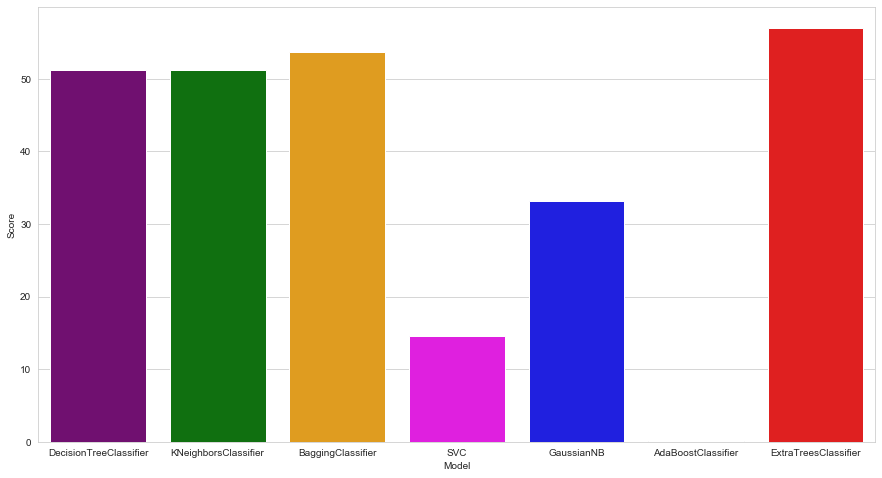

In [45]:
colors = ["purple", "green", "orange", "magenta","blue","black","red"]

sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()

In [46]:
import sweetviz as sv

In [47]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |                                             | [  0%]   00:00 ->…

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [48]:
from IPython.display import IFrame

In [49]:
IFrame(src='Analyze.html',width=1000,height=600)

In [51]:
df.head().T

,0,1,2,3,4
location,Albania,Albania,Albania,Albania,Albania
p_scores_all_ages,-10.65,2.17,0.62,3.23,6.15
p_scores_15_64,0.0,0.0,0.0,0.0,0.0
p_scores_65_74,0.0,0.0,0.0,0.0,0.0
p_scores_75_84,0.0,0.0,0.0,0.0,0.0
p_scores_85plus,0.0,0.0,0.0,0.0,0.0
deaths_2020_all_ages,2187.0,2018.0,1993.0,1804.0,1803.0
average_deaths_2015_2019_all_ages,2447.8,1975.2,1980.8,1747.6,1698.6
deaths_2015_all_ages,2490.0,2139.0,2051.0,1906.0,1709.0
deaths_2016_all_ages,2065.0,1905.0,1910.0,1652.0,1716.0


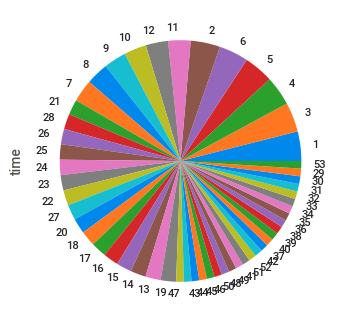

In [53]:
df.time.value_counts().plot(kind='pie')

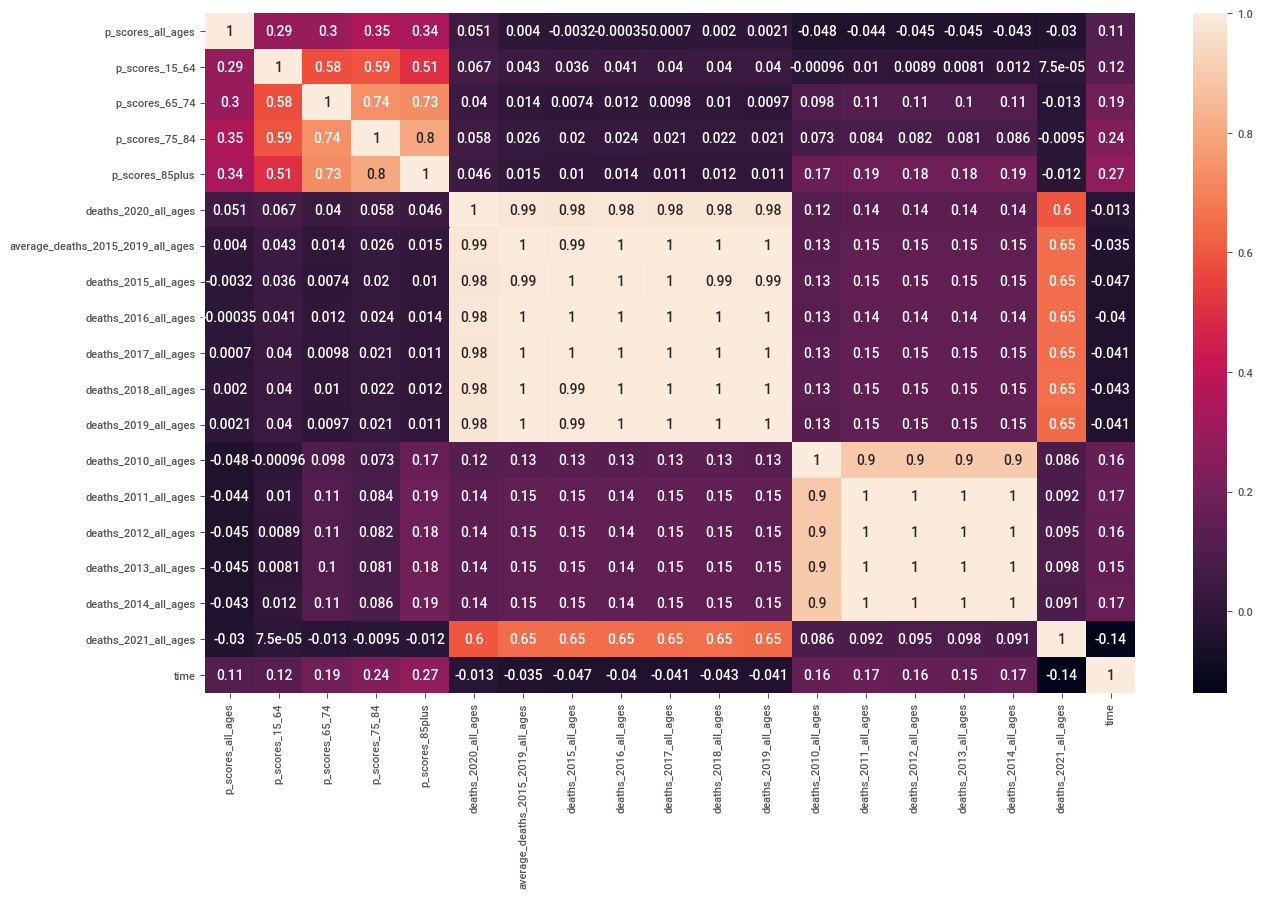

In [54]:
plt.figure(figsize = (15,9))
sns.heatmap(df.corr(), annot = True)

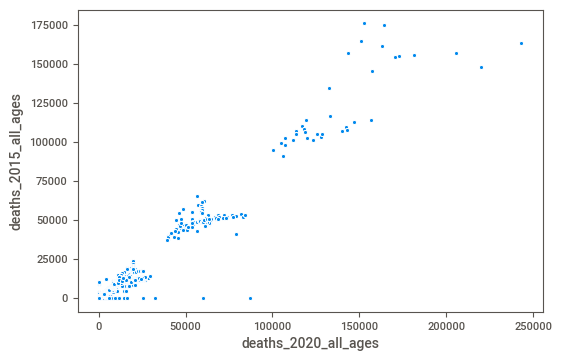

In [56]:
sns.scatterplot(x=df["deaths_2020_all_ages"], y=df["deaths_2015_all_ages"], 
data=df)

In [57]:
df.corr().abs()['deaths_2017_all_ages'].sort_values(ascending = False)

deaths_2017_all_ages                 1.000000
deaths_2018_all_ages                 0.998906
deaths_2019_all_ages                 0.998813
deaths_2016_all_ages                 0.998512
average_deaths_2015_2019_all_ages    0.996749
deaths_2015_all_ages                 0.995133
deaths_2020_all_ages                 0.981275
deaths_2021_all_ages                 0.652451
deaths_2013_all_ages                 0.150760
deaths_2011_all_ages                 0.150096
deaths_2012_all_ages                 0.150083
deaths_2014_all_ages                 0.149740
deaths_2010_all_ages                 0.130260
time                                 0.041212
p_scores_15_64                       0.039766
p_scores_75_84                       0.021053
p_scores_85plus                      0.011040
p_scores_65_74                       0.009812
p_scores_all_ages                    0.000700
Name: deaths_2017_all_ages, dtype: float64

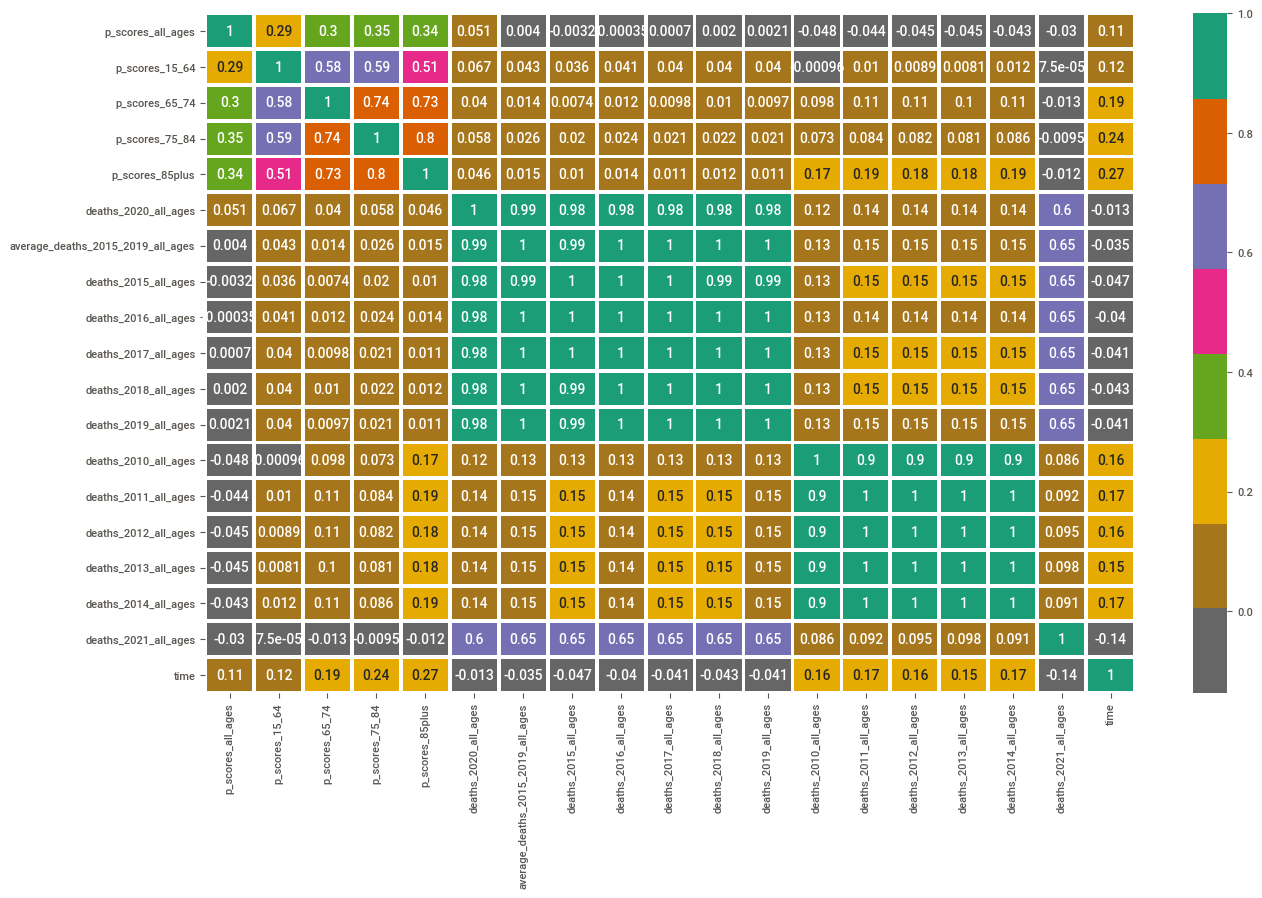

In [58]:
plt.figure(figsize=(15,9))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(),annot=True,cmap='Dark2_r',linewidths=2)
plt.show()

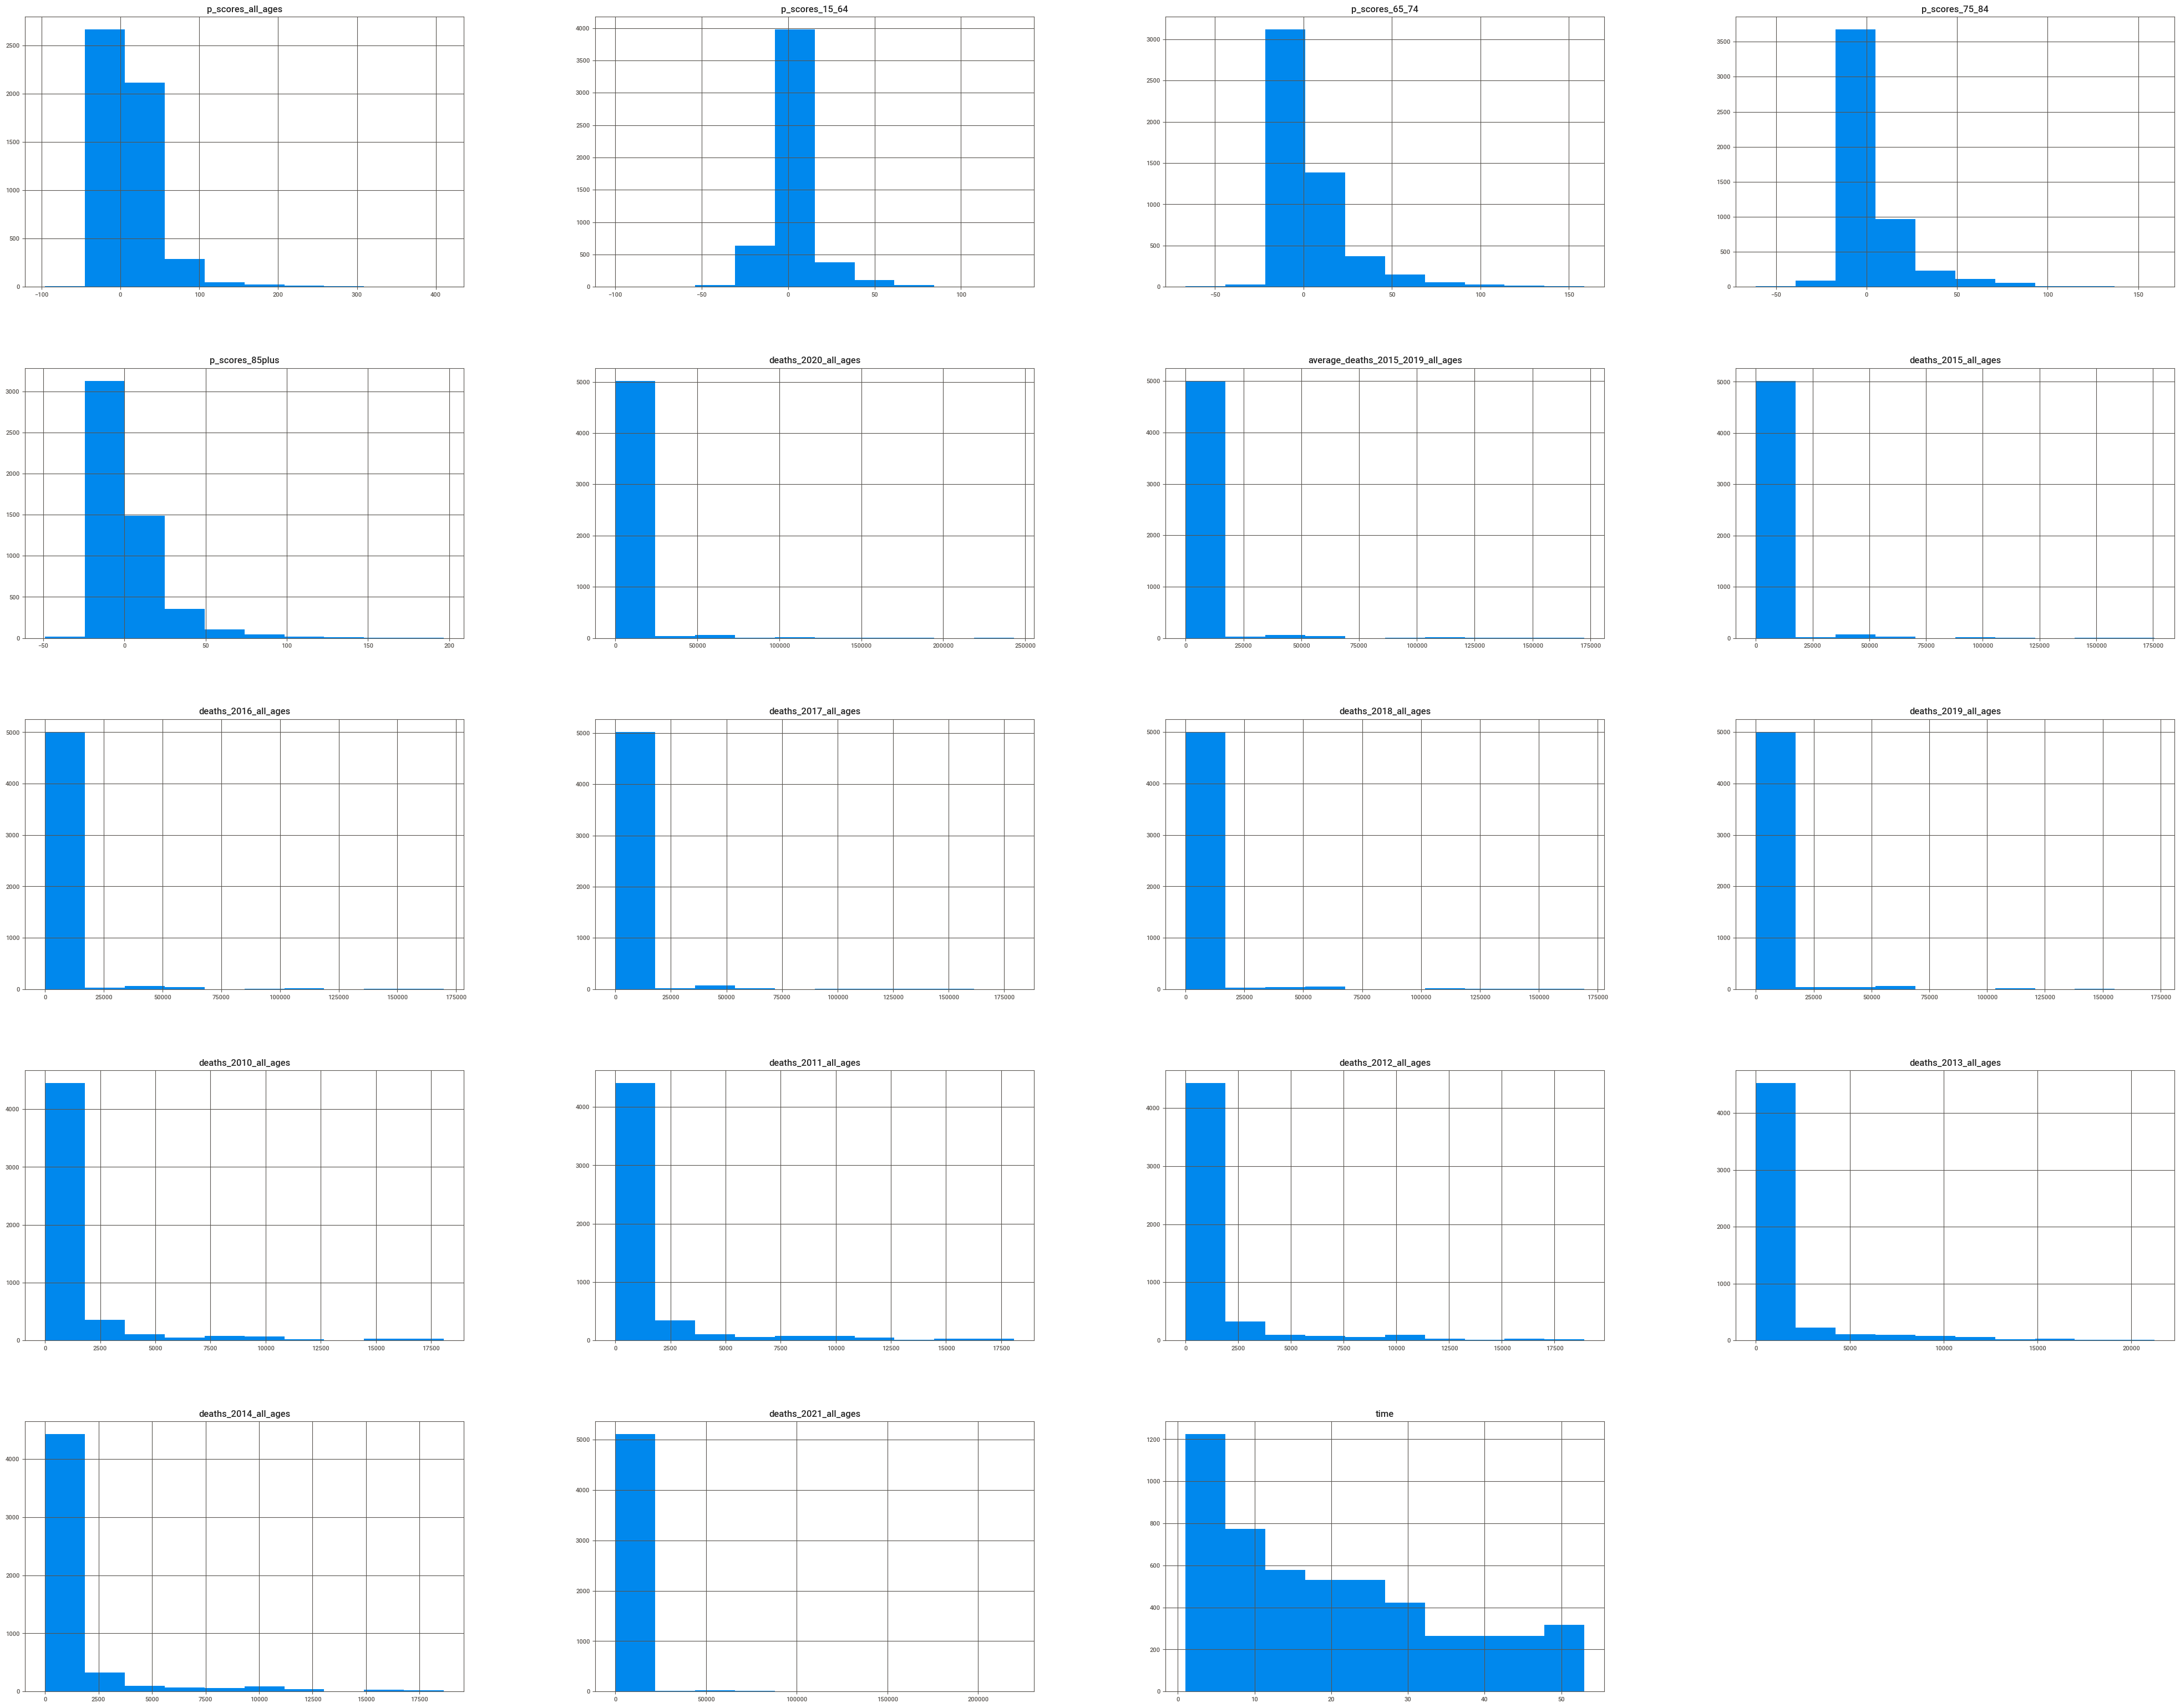

In [59]:
df.hist(figsize=(50,40))
plt.show()

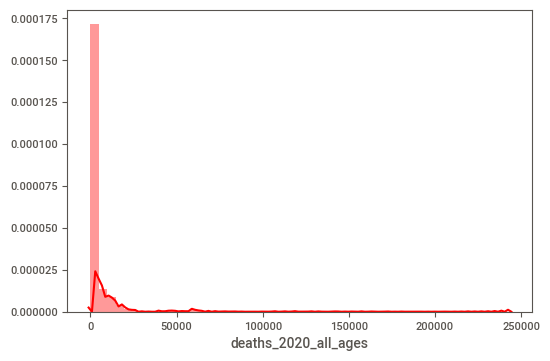

In [65]:
sns.distplot(df['deaths_2020_all_ages'],color='red')

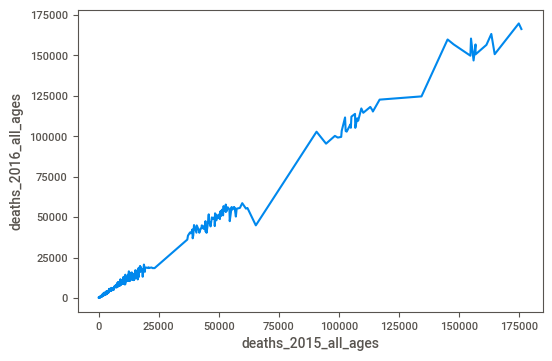

In [66]:
sns.lineplot(x=df["deaths_2015_all_ages"], y=df["deaths_2016_all_ages"], 
data=df)

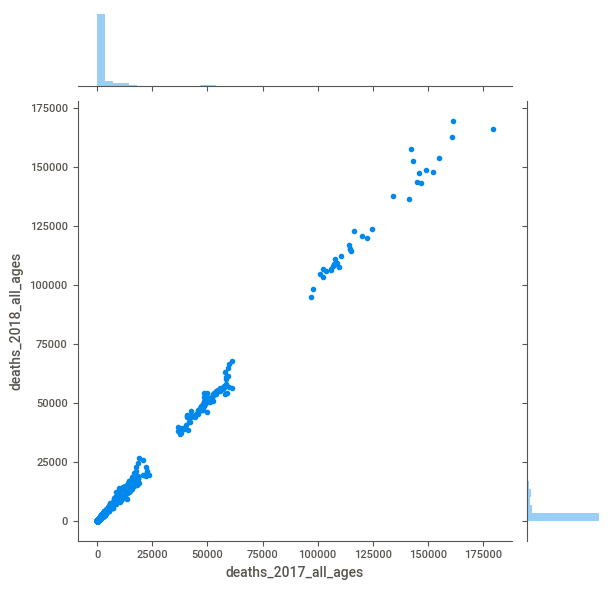

In [70]:
sns.jointplot(x=df["deaths_2017_all_ages"], y=df["deaths_2018_all_ages"],
data=df)

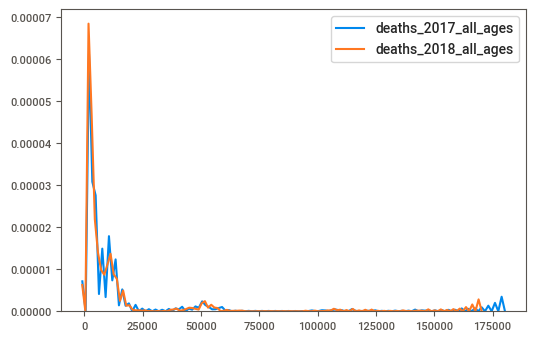

In [71]:
sns.kdeplot(df['deaths_2017_all_ages'])
#sns.kdeplot(df['student2'])
sns.kdeplot(df['deaths_2018_all_ages'])

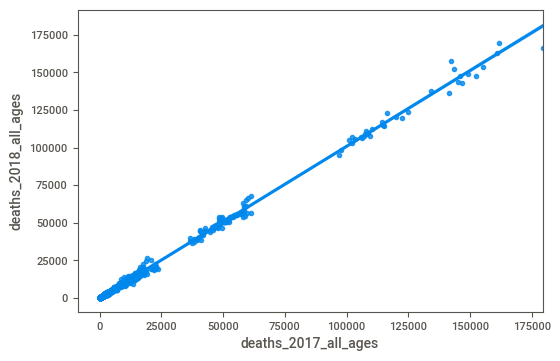

In [75]:
sns.regplot(x=df["deaths_2017_all_ages"], y=df["deaths_2018_all_ages"], 
data=df)

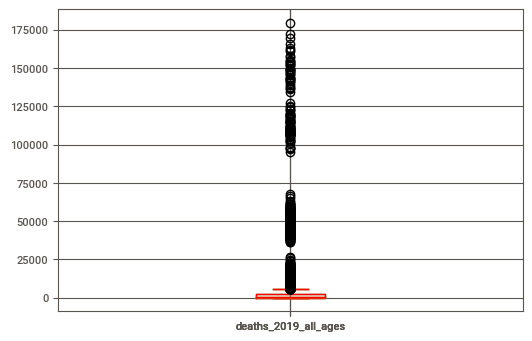

In [76]:
df.boxplot(column="deaths_2017_all_ages")
df.boxplot(column="deaths_2018_all_ages",color='orange')
df.boxplot(column="deaths_2019_all_ages",color='red')

In [77]:
df.columns

Index(['location', 'p_scores_all_ages', 'p_scores_15_64', 'p_scores_65_74',
       'p_scores_75_84', 'p_scores_85plus', 'deaths_2020_all_ages',
       'average_deaths_2015_2019_all_ages', 'deaths_2015_all_ages',
       'deaths_2016_all_ages', 'deaths_2017_all_ages', 'deaths_2018_all_ages',
       'deaths_2019_all_ages', 'deaths_2010_all_ages', 'deaths_2011_all_ages',
       'deaths_2012_all_ages', 'deaths_2013_all_ages', 'deaths_2014_all_ages',
       'deaths_2021_all_ages', 'time'],
      dtype='object')

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [80]:
man=MinMaxScaler()
feat=[ 'p_scores_all_ages', 'p_scores_15_64', 'p_scores_65_74',
       'p_scores_75_84', 'p_scores_85plus', 'deaths_2020_all_ages',
       'average_deaths_2015_2019_all_ages', 'deaths_2015_all_ages',
       'deaths_2016_all_ages', 'deaths_2017_all_ages', 'deaths_2018_all_ages',
       'deaths_2019_all_ages', 'deaths_2010_all_ages', 'deaths_2011_all_ages',
       'deaths_2012_all_ages', 'deaths_2013_all_ages', 'deaths_2014_all_ages',
       'deaths_2021_all_ages', 'time']
df[feat]=man.fit_transform(df[feat])
df[feat]

,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,deaths_2021_all_ages,time
0,0.167962,0.433332,0.29568,0.277495,0.198949,0.008991,0.014195,0.014163,0.012163,0.017440,0.012738,0.013900,0.0,0.0,0.0,0.0,0.0,0.013546,0.000000
1,0.193312,0.433332,0.29568,0.277495,0.198949,0.008297,0.011455,0.012167,0.011221,0.010284,0.011883,0.011447,0.0,0.0,0.0,0.0,0.0,0.017009,0.019231
2,0.190247,0.433332,0.29568,0.277495,0.198949,0.008194,0.011487,0.011666,0.011250,0.010128,0.012609,0.011540,0.0,0.0,0.0,0.0,0.0,0.013387,0.038462
3,0.195408,0.433332,0.29568,0.277495,0.198949,0.007417,0.010135,0.010841,0.009731,0.009280,0.010791,0.009782,0.0,0.0,0.0,0.0,0.0,0.000000,0.057692
4,0.201182,0.433332,0.29568,0.277495,0.198949,0.007413,0.009850,0.009721,0.010108,0.009253,0.009822,0.010113,0.0,0.0,0.0,0.0,0.0,0.000000,0.076923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,0.198434,0.433332,0.29568,0.277495,0.198949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.019231
5170,0.192165,0.433332,0.29568,0.277495,0.198949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.038462
5171,0.189021,0.433332,0.29568,0.277495,0.198949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.057692
5172,0.189021,0.433332,0.29568,0.277495,0.198949,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.076923


In [81]:
std=StandardScaler()
feat=['p_scores_all_ages', 'p_scores_15_64', 'p_scores_65_74',
       'p_scores_75_84', 'p_scores_85plus', 'deaths_2020_all_ages',
       'average_deaths_2015_2019_all_ages', 'deaths_2015_all_ages',
       'deaths_2016_all_ages', 'deaths_2017_all_ages', 'deaths_2018_all_ages',
       'deaths_2019_all_ages', 'deaths_2010_all_ages', 'deaths_2011_all_ages',
       'deaths_2012_all_ages', 'deaths_2013_all_ages', 'deaths_2014_all_ages',
       'deaths_2021_all_ages', 'time']
df[feat]=std.fit_transform(df[feat])
df[feat]

,p_scores_all_ages,p_scores_15_64,p_scores_65_74,p_scores_75_84,p_scores_85plus,deaths_2020_all_ages,average_deaths_2015_2019_all_ages,deaths_2015_all_ages,deaths_2016_all_ages,deaths_2017_all_ages,deaths_2018_all_ages,deaths_2019_all_ages,deaths_2010_all_ages,deaths_2011_all_ages,deaths_2012_all_ages,deaths_2013_all_ages,deaths_2014_all_ages,deaths_2021_all_ages,time
0,-0.769344,-0.14838,-0.393277,-0.302374,-0.368307,-0.144016,-0.102399,-0.086623,-0.124111,-0.045948,-0.124331,-0.106634,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,0.099361,-1.268213
1,-0.381051,-0.14838,-0.393277,-0.302374,-0.368307,-0.155473,-0.139369,-0.114313,-0.136677,-0.146946,-0.135641,-0.139431,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,0.168289,-1.200556
2,-0.427997,-0.14838,-0.393277,-0.302374,-0.368307,-0.157168,-0.138931,-0.121256,-0.136284,-0.149149,-0.126047,-0.138191,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,0.096190,-1.132899
3,-0.348945,-0.14838,-0.393277,-0.302374,-0.368307,-0.169981,-0.157174,-0.132695,-0.156546,-0.161105,-0.150071,-0.161683,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,-0.170286,-1.065241
4,-0.260504,-0.14838,-0.393277,-0.302374,-0.368307,-0.170048,-0.161007,-0.148236,-0.151519,-0.161498,-0.162862,-0.157264,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,-0.170286,-0.997584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,-0.302605,-0.14838,-0.393277,-0.302374,-0.368307,-0.292280,-0.293884,-0.283059,-0.286282,-0.292072,-0.292651,-0.292482,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,-0.170286,-1.200556
5170,-0.398618,-0.14838,-0.393277,-0.302374,-0.368307,-0.292280,-0.293884,-0.283059,-0.286282,-0.292072,-0.292651,-0.292482,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,-0.170286,-1.132899
5171,-0.446776,-0.14838,-0.393277,-0.302374,-0.368307,-0.292280,-0.293884,-0.283059,-0.286282,-0.292072,-0.292651,-0.292482,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,-0.170286,-1.065241
5172,-0.446776,-0.14838,-0.393277,-0.302374,-0.368307,-0.292280,-0.293884,-0.283059,-0.286282,-0.292072,-0.292651,-0.292482,-0.368756,-0.38428,-0.383152,-0.380552,-0.384678,-0.170286,-0.997584
